# Import Statements

In [2]:
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from spotifyClient import SpotifyAPI

pd.set_option('display.max_columns', None) 

# Read In Data

In [167]:
spotify_df = pd.read_csv('../data/spotify_pull.csv')
print(spotify_df.shape)
spotify_df.head()

(2871, 37)


,Unnamed: 0,song,album_name,artist,popularity,track_id,track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id_x,uri,track_href,analysis_url,duration_ms,time_signature,num_samples,duration,analysis_sample_rate,end_of_fade_in,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,id_y,id,genres
0,0,El Paso City,The Essential Marty Robbins 1951-1982,Marty Robbins,41,4CIaUS9qVxS6RsQBnC37EU,False,0.597,0.4720,0,-11.721,1,0.0342,0.828,0.000002,0.144,0.561,107.590,audio_features,4CIaUS9qVxS6RsQBnC37EU,spotify:track:4CIaUS9qVxS6RsQBnC37EU,https://api.spotify.com/v1/tracks/4CIaUS9qVxS6...,https://api.spotify.com/v1/audio-analysis/4CIa...,251773,4,5551602,251.77333,22050,0.11723,244.99956,0.767,0.708,0.914,0.788,4CIaUS9qVxS6RsQBnC37EU,4CIaUS9qVxS6RsQBnC37EU,"['cowboy western', 'nashville sound']"
1,1,Faleena (from El Paso),The Drifter,Marty Robbins,38,2jqx9Oq9ZErm5ywDblnvHi,False,0.644,0.3520,4,-10.562,1,0.0358,0.874,0.000000,0.140,0.643,96.896,audio_features,2jqx9Oq9ZErm5ywDblnvHi,spotify:track:2jqx9Oq9ZErm5ywDblnvHi,https://api.spotify.com/v1/tracks/2jqx9Oq9ZErm...,https://api.spotify.com/v1/audio-analysis/2jqx...,498387,3,10989426,498.38666,22050,0.24721,492.39075,0.378,0.607,0.890,0.714,2jqx9Oq9ZErm5ywDblnvHi,2jqx9Oq9ZErm5ywDblnvHi,"['cowboy western', 'nashville sound']"
2,2,Running Bear - Remastered,Golden Selection (Remastered),Johnny Preston,32,0x6gSfnYA91AHPLvULn5NK,False,0.762,0.4190,5,-9.312,0,0.0653,0.744,0.000000,0.144,0.765,119.964,audio_features,0x6gSfnYA91AHPLvULn5NK,spotify:track:0x6gSfnYA91AHPLvULn5NK,https://api.spotify.com/v1/tracks/0x6gSfnYA91A...,https://api.spotify.com/v1/audio-analysis/0x6g...,158213,4,3488604,158.21333,22050,0.00000,151.93398,0.639,1.000,0.766,0.602,0x6gSfnYA91AHPLvULn5NK,0x6gSfnYA91AHPLvULn5NK,"['brill building pop', 'deep adult standards',..."
3,3,Running Bear,Greatest Hits,Johnny Preston,36,1RYznli2VNO7FCbW1Hq4KM,False,0.772,0.2970,5,-14.679,0,0.0530,0.854,0.000008,0.125,0.822,119.987,audio_features,1RYznli2VNO7FCbW1Hq4KM,spotify:track:1RYznli2VNO7FCbW1Hq4KM,https://api.spotify.com/v1/tracks/1RYznli2VNO7...,https://api.spotify.com/v1/audio-analysis/1RYz...,158200,4,3488310,158.20000,22050,1.13624,151.88753,0.700,1.000,0.686,0.585,1RYznli2VNO7FCbW1Hq4KM,1RYznli2VNO7FCbW1Hq4KM,"['brill building pop', 'deep adult standards',..."
4,4,Teen Angel,The Lovin' Touch,Mark Dinning,30,3PymNAkWROfyEVeYq6XtjD,False,0.584,0.0863,0,-15.537,1,0.0403,0.775,0.000000,0.212,0.460,101.493,audio_features,3PymNAkWROfyEVeYq6XtjD,spotify:track:3PymNAkWROfyEVeYq6XtjD,https://api.spotify.com/v1/tracks/3PymNAkWROfy...,https://api.spotify.com/v1/audio-analysis/3Pym...,158200,4,3488310,158.20000,22050,0.30227,151.19093,0.438,0.767,0.886,0.725,3PymNAkWROfyEVeYq6XtjD,3PymNAkWROfyEVeYq6XtjD,[]


In [12]:
hot100 = pd.read_csv('../data/hot100_60-99.csv')
print(hot100.shape)
hot100.head()

(828, 4)


,Unnamed: 0,Song,Artist(s),year
0,0,El Paso,Marty Robbins,1960
1,1,Running Bear,Johnny Preston,1960
2,2,Teen Angel,Mark Dinning,1960
3,3,Theme from A Summer Place,Percy Faith,1960
4,4,Stuck on You,Elvis Presley,1960


# Data Cleaning

One of the first things I want to do when exploring the data I have is to compare the Billboard Hot 100 dataset with the Spotify dataset to see if there were any songs that were missed. In order to make sure I'm able to get the most accurate comparison, I will first want to clean up the string values in the 'song' and 'artist' columns for both datasets. This clean up will include removing special characters, as well as making all characters lowercase. There is a chance this could alter the song or artist name in a way that misspells the name, however I have the track_id to check the song against the Spotify WebAPI incase there are any issues.

### Hot 100 Dataset

In [13]:
# drop 'Unnamed: 0' col
hot100.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [14]:
# rename hot 100 columns to make them easier to work with
hot100.rename({'Song': 'song', 'Artist(s)': 'artist'}, axis=1, inplace=True)

In [11]:
# Create a function to clean strings in 'Song' and 'Artist(s)' col
# this can be used for both hot100 and for df to remove any special characters
# that may differ between these two datasets
def str_col_cleanup(df, columns):
    # Define the special characters to get rid of
    special_characters = "()-_\"\'\/_"
    
    # loop through columns in a list of columns of type object
    for col in columns:
        # loop through special characters replacing with empty string
        for char in special_characters:
            df[col] = df[col].str.replace(char, '', regex=False)
        # lower all values in the series 
        df[col] = df[col].str.lower()
        
    return df

In [15]:
# run the function on the needed object columns in hot100
hot100 = str_col_cleanup(hot100, ['song', 'artist'])

In [16]:
print(hot100.shape)
hot100.head()

(828, 3)


,song,artist,year
0,el paso,marty robbins,1960
1,running bear,johnny preston,1960
2,teen angel,mark dinning,1960
3,theme from a summer place,percy faith,1960
4,stuck on you,elvis presley,1960


## Spotify Dataset

In [177]:
# specify the columns I want to drop, and drop them
col_to_drop = ['Unnamed: 0', 'id', 'id_x', 'uri', 'track_href', 'analysis_url', 'id_y', 'type', 'analysis_sample_rate']
spotify_df.drop(columns=col_to_drop, axis=1, inplace=True)

# rename columns so they are similar with the hot100 
spotify_df.rename({'album_name': 'album'}, axis=1, inplace=True)

# run the cleanup function on the needed object columns in spotify
spotify_df = str_col_cleanup(spotify_df, ['song', 'artist'])

Next I want to look through spotify for any duplicate entries that may have been pulled. I will focus on looking for duplicates in the 'track_id' column as these ids are specific to the SpotifyAPI and can be used to easily reference the unique values.

In [178]:
# Show any duplicate entries of songs found in the track_id column
spotify_df[spotify_df.duplicated(subset='track_id')]

,song,album,artist,popularity,track_id,track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_samples,duration,end_of_fade_in,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,genres
112,medley: sherry walk like a man big girls don...,Reunited Live,frankie valli & the four seasons,32,3gHci6N1SEb58tTDei9RpH,False,0.501,0.718,0,-7.347,1,0.0379,0.0457,0.000287,0.756,0.815,121.419,299027,4,6593538,299.02667,0.00000,283.48663,0.481,0.936,0.258,0.289,"['adult standards', 'brill building pop', 'bub..."
113,medley: sherry walk like a man big girls don...,Reunited Live,frankie valli & the four seasons,32,3gHci6N1SEb58tTDei9RpH,False,0.501,0.718,0,-7.347,1,0.0379,0.0457,0.000287,0.756,0.815,121.419,299027,4,6593538,299.02667,0.00000,283.48663,0.481,0.936,0.258,0.289,"['adult standards', 'brill building pop', 'bub..."
114,medley: sherry walk like a man big girls don...,Reunited Live,frankie valli & the four seasons,32,3gHci6N1SEb58tTDei9RpH,False,0.501,0.718,0,-7.347,1,0.0379,0.0457,0.000287,0.756,0.815,121.419,299027,4,6593538,299.02667,0.00000,283.48663,0.481,0.936,0.258,0.289,"['adult standards', 'brill building pop', 'bub..."
115,medley: sherry walk like a man big girls don...,Reunited Live,frankie valli & the four seasons,32,3gHci6N1SEb58tTDei9RpH,False,0.501,0.718,0,-7.347,1,0.0379,0.0457,0.000287,0.756,0.815,121.419,299027,4,6593538,299.02667,0.00000,283.48663,0.481,0.936,0.258,0.289,"['adult standards', 'brill building pop', 'bub..."
116,medley: sherry walk like a man big girls don...,Reunited Live,frankie valli & the four seasons,32,3gHci6N1SEb58tTDei9RpH,False,0.501,0.718,0,-7.347,1,0.0379,0.0457,0.000287,0.756,0.815,121.419,299027,4,6593538,299.02667,0.00000,283.48663,0.481,0.936,0.258,0.289,"['adult standards', 'brill building pop', 'bub..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2132,stayin alive from saturday night fever soundt...,Tales From The Brothers Gibb,bee gees,52,79hJaqmVdohltPBNN6BULM,False,0.708,0.567,10,-15.539,0,0.0355,0.0700,0.001050,0.152,0.955,103.606,281667,4,6210750,281.66666,0.22095,274.81976,0.964,1.000,0.481,0.573,"['disco', 'mellow gold', 'soft rock']"
2133,stayin alive from saturday night fever soundt...,Tales From The Brothers Gibb,bee gees,52,79hJaqmVdohltPBNN6BULM,False,0.708,0.567,10,-15.539,0,0.0355,0.0700,0.001050,0.152,0.955,103.606,281667,4,6210750,281.66666,0.22095,274.81976,0.964,1.000,0.481,0.573,"['disco', 'mellow gold', 'soft rock']"
2134,stayin alive from saturday night fever soundt...,Tales From The Brothers Gibb,bee gees,52,79hJaqmVdohltPBNN6BULM,False,0.708,0.567,10,-15.539,0,0.0355,0.0700,0.001050,0.152,0.955,103.606,281667,4,6210750,281.66666,0.22095,274.81976,0.964,1.000,0.481,0.573,"['disco', 'mellow gold', 'soft rock']"
2135,stayin alive from saturday night fever soundt...,Tales From The Brothers Gibb,bee gees,52,79hJaqmVdohltPBNN6BULM,False,0.708,0.567,10,-15.539,0,0.0355,0.0700,0.001050,0.152,0.955,103.606,281667,4,6210750,281.66666,0.22095,274.81976,0.964,1.000,0.481,0.573,"['disco', 'mellow gold', 'soft rock']"


There seems to be 1275 rows of duplicate entries in spotify. I will remove all these duplicates leaving the first value that appears in the dataframe as these duplicates provide no added benefit to my final recommender.

In [179]:
# remove duplicate entries on the track_id col 
spotify_df.drop_duplicates(subset='track_id', inplace=True)

In [180]:
# recheck for duplicates to make sure they were removed
spotify_df[spotify_df.duplicated(subset='track_id')]

,song,album,artist,popularity,track_id,track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_samples,duration,end_of_fade_in,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,genres


In [181]:
# encode boolean values to 0 and 1
spotify_df['track_explicit'] = spotify_df['track_explicit'].astype(int)

In [182]:
print(spotify_df.shape)
spotify_df.head()

(1596, 28)


,song,album,artist,popularity,track_id,track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_samples,duration,end_of_fade_in,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,genres
0,el paso city,The Essential Marty Robbins 1951-1982,marty robbins,41,4CIaUS9qVxS6RsQBnC37EU,0,0.597,0.4720,0,-11.721,1,0.0342,0.828,0.000002,0.144,0.561,107.590,251773,4,5551602,251.77333,0.11723,244.99956,0.767,0.708,0.914,0.788,"['cowboy western', 'nashville sound']"
1,faleena from el paso,The Drifter,marty robbins,38,2jqx9Oq9ZErm5ywDblnvHi,0,0.644,0.3520,4,-10.562,1,0.0358,0.874,0.000000,0.140,0.643,96.896,498387,3,10989426,498.38666,0.24721,492.39075,0.378,0.607,0.890,0.714,"['cowboy western', 'nashville sound']"
2,running bear remastered,Golden Selection (Remastered),johnny preston,32,0x6gSfnYA91AHPLvULn5NK,0,0.762,0.4190,5,-9.312,0,0.0653,0.744,0.000000,0.144,0.765,119.964,158213,4,3488604,158.21333,0.00000,151.93398,0.639,1.000,0.766,0.602,"['brill building pop', 'deep adult standards',..."
3,running bear,Greatest Hits,johnny preston,36,1RYznli2VNO7FCbW1Hq4KM,0,0.772,0.2970,5,-14.679,0,0.0530,0.854,0.000008,0.125,0.822,119.987,158200,4,3488310,158.20000,1.13624,151.88753,0.700,1.000,0.686,0.585,"['brill building pop', 'deep adult standards',..."
4,teen angel,The Lovin' Touch,mark dinning,30,3PymNAkWROfyEVeYq6XtjD,0,0.584,0.0863,0,-15.537,1,0.0403,0.775,0.000000,0.212,0.460,101.493,158200,4,3488310,158.20000,0.30227,151.19093,0.438,0.767,0.886,0.725,[]


# EDA

First I want to make sure that I have the correct year for each of the songs in the main dataframe. To do this, I will find the matching song from the hot100 dataframe and pull the year from there into the main dataframe. I wanted to do this rather then pull the years from Spotify because this project will be initally based on the billboard hot 100 webscrape I did earlier on. This way all versions of the song will have the same year as what billboard reported.

In [183]:
# Set up an empty list to hold year values as I iterate through the
# dataframes looking for song matches
years_list = []

for i, song_name in spotify_df['song'].items():
    for j, song in hot100['song'].items():
        # Some songs were named a bit differently on 
        # spotify then wiki so by checking if song is in song_name   
        # rather then equal to it I can catch those ones
        if song in song_name:
            years_list.append(hot100['year'][j])
            break

In [184]:
# Make sure the length of the years_list is the same as the main dataframe 
len(years_list) == spotify_df.shape[0]

True

In [185]:
# Since they are the same shape I can add a new column for the years
spotify_df['year'] = years_list

This project is also focusing on the specific decade that the song made it to the Billboard Hot 100. As such I want to make sure I get a column for the decade each song is in.

In [186]:
# source : https://stackoverflow.com/questions/17764619/pandas-dataframe-group-year-index-by-decade
# Set up an empty list to hold decade values 
# as I iterate through the year column
decade = []

for year in spotify_df['year']:
    decade.append((year // 10)*10)
    
spotify_df['decade'] = decade

spotify_df.head()

,song,album,artist,popularity,track_id,track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_samples,duration,end_of_fade_in,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,genres,year,decade
0,el paso city,The Essential Marty Robbins 1951-1982,marty robbins,41,4CIaUS9qVxS6RsQBnC37EU,0,0.597,0.4720,0,-11.721,1,0.0342,0.828,0.000002,0.144,0.561,107.590,251773,4,5551602,251.77333,0.11723,244.99956,0.767,0.708,0.914,0.788,"['cowboy western', 'nashville sound']",1960,1960
1,faleena from el paso,The Drifter,marty robbins,38,2jqx9Oq9ZErm5ywDblnvHi,0,0.644,0.3520,4,-10.562,1,0.0358,0.874,0.000000,0.140,0.643,96.896,498387,3,10989426,498.38666,0.24721,492.39075,0.378,0.607,0.890,0.714,"['cowboy western', 'nashville sound']",1960,1960
2,running bear remastered,Golden Selection (Remastered),johnny preston,32,0x6gSfnYA91AHPLvULn5NK,0,0.762,0.4190,5,-9.312,0,0.0653,0.744,0.000000,0.144,0.765,119.964,158213,4,3488604,158.21333,0.00000,151.93398,0.639,1.000,0.766,0.602,"['brill building pop', 'deep adult standards',...",1960,1960
3,running bear,Greatest Hits,johnny preston,36,1RYznli2VNO7FCbW1Hq4KM,0,0.772,0.2970,5,-14.679,0,0.0530,0.854,0.000008,0.125,0.822,119.987,158200,4,3488310,158.20000,1.13624,151.88753,0.700,1.000,0.686,0.585,"['brill building pop', 'deep adult standards',...",1960,1960
4,teen angel,The Lovin' Touch,mark dinning,30,3PymNAkWROfyEVeYq6XtjD,0,0.584,0.0863,0,-15.537,1,0.0403,0.775,0.000000,0.212,0.460,101.493,158200,4,3488310,158.20000,0.30227,151.19093,0.438,0.767,0.886,0.725,[],1960,1960


## Songs Per Decade/Year

I want to get an idea of my song distribution among decades and years. Not only will this be good for understanding my data better, I can check for any songs that were missing from the Spotify search by checking against the distribution count for the hot100 dataset.  

In [187]:
# get the count of entries per decade using track_id  
# as the unique identifier to count on
decade_count = spotify_df.groupby('decade')['track_id'].count()
decade_count

decade
1960    439
1970    589
1980    403
1990    165
Name: track_id, dtype: int64

Immediately I see a problem with the decade 1990. The other decades seem to be fairly consistent with each other, although I suspect the lower number from 1980 indicates some missing data as well.

In [188]:
year_count = spotify_df.groupby('year')['track_id'].count().sort_values()
year_count.head(15)

year
1992     3
1994     5
1997     7
1998     7
1996     9
1982    14
1993    17
1995    18
1983    20
1999    23
1963    24
1968    28
1980    29
1991    30
1969    31
Name: track_id, dtype: int64

Let's start with the worst offenders, the years in 1990 with under 10 song entries. I'll write a function to compare the entries from each of the years in the spotify dataset with the songs from the hot 100 to determine whether there was trouble with the spotify search, or if that particular year just didn't have many songs on the hot 100.

In [190]:
for song in hot100[hot100['year'] == 1992]['song']:
    if spotify_df[spotify_df['year'] == 1992]['song'].isin([song]).any():
        print('Found Song!')
    else:
        print(song)

Found Song!
dont let the sun go down on me
im too sexy
to be with you
save the best for last
jump
ill be there
baby got back
Found Song!
Found Song!
how do you talk to an angel
i will always love you


In [10]:
def compare_years(year, df_1=hot100, df_2=spotify_df):
    hot100_year_songs = df_1[df_1['year'] == year]['song']
    missing_songs = []
    for song in hot100_year_songs:
        if df_2[df_2['year'] == year]['song'].isin([song]).any():
            pass
        else:
            missing_songs.append(song)
    
    return missing_songs

NameError: name 'hot100' is not defined

In [192]:
missing_songs = {}
for year in year_count.index:
    
    missing = compare_years(year)
    
    if len(missing) > 0:
        missing_songs[year] = missing
        
missing_songs_count = []
for year in missing_songs:
    missing_songs_count.append([year , len(missing_songs[year])])

In [193]:
missing_songs_count.sort(reverse=True, key=lambda x: x[1])
missing_songs_count

[[1975, 23],
 [1977, 20],
 [1991, 19],
 [1989, 19],
 [1987, 19],
 [1986, 19],
 [1965, 18],
 [1985, 18],
 [1973, 17],
 [1974, 16],
 [1966, 15],
 [1988, 14],
 [1979, 14],
 [1970, 13],
 [1998, 12],
 [1978, 12],
 [1990, 12],
 [1982, 11],
 [1969, 11],
 [1971, 11],
 [1976, 11],
 [1963, 10],
 [1980, 10],
 [1964, 10],
 [1992, 9],
 [1983, 9],
 [1968, 9],
 [1997, 8],
 [1995, 8],
 [1999, 8],
 [1981, 8],
 [1984, 8],
 [1960, 8],
 [1972, 8],
 [1994, 7],
 [1996, 7],
 [1993, 6],
 [1961, 6],
 [1962, 5],
 [1967, 5]]

In [194]:
for year_count in missing_songs_count[:10]:
    print('------------------')
    print(f"{year_count[0]} ---> {year_count[1]} missing")
    print('------------------')
    for song in missing_songs[year]:
        print(song)
    print('------------------')

------------------
1975 ---> 23 missing
------------------
i will survive
what a fool believes
knock on wood
heart of glass
reunited
good times
sad eyes
dont stop til you get enough
rise
pop muzik
heartache tonight
still
no more tears enough is enough
escape the piña colada song
------------------
------------------
1977 ---> 20 missing
------------------
i will survive
what a fool believes
knock on wood
heart of glass
reunited
good times
sad eyes
dont stop til you get enough
rise
pop muzik
heartache tonight
still
no more tears enough is enough
escape the piña colada song
------------------
------------------
1991 ---> 19 missing
------------------
i will survive
what a fool believes
knock on wood
heart of glass
reunited
good times
sad eyes
dont stop til you get enough
rise
pop muzik
heartache tonight
still
no more tears enough is enough
escape the piña colada song
------------------
------------------
1989 ---> 19 missing
------------------
i will survive
what a fool believes
knock on

Even after only grabbing the first 10 years with the longest list of missing songs, I can see that the inital Spotify pull was incomplete. I will now go through the missing songs and adding them to the dataset.

# Gathering Missed Song Data From Spotify

I will be using the same data pull algorithm I used previously to go over the missing songs and collect the data where possible. I will be modifying the algorithm as I go along to adjust for any special cases that arise when dealing with each year. To make sure I reduce the possibility of a search error, I will be going over 10 years at a time. Furthermore, to make sure I'm making the most impact, I will be starting with the years with the most missing songs and work my way down to years with the fewest.

In [91]:
track_list = []

In [92]:
# Authenticating Client
spotify = SpotifyAPI()

for year_count in missing_songs_count[:10]:
    for song in missing_songs[year_count[0]]:
        track_search = spotify.search({"track": str(song)}, search_type="track")
        
        if len(track_search['tracks']['items']) > 0:
            for i in range(len(track_search['tracks']['items'])):
                song_info = []
                if song in track_search['tracks']['items'][i]['name'].lower():
                    if hot100[hot100['song'] == song]['artist'].array[0] in track_search['tracks']['items'][i]['artists'][0]['name'].lower():
                        song_info.append(track_search['tracks']['items'][i]['name'])
                        song_info.append(track_search['tracks']['items'][i]['album']['name'])
                        song_info.append(track_search['tracks']['items'][i]['album']['artists'][0]['name'])
                        song_info.append(track_search['tracks']['items'][i]['popularity'])
                        song_info.append(track_search['tracks']['items'][i]['id'])
                        song_info.append(track_search['tracks']['items'][i]['explicit'])

                        track_list.append(song_info)

    time.sleep(3)
                    
            

q=track%3Alucy+in+the+sky+with+diamonds&type=track
q=track%3Aplease+mr.+postman&type=track
q=track%3Afire&type=track
q=track%3Ayoure+no+good&type=track
q=track%3Apick+up+the+pieces&type=track
q=track%3Abest+of+my+love&type=track
q=track%3Ablack+water&type=track
q=track%3Alady+marmalade&type=track
q=track%3Alovin+you&type=track
q=track%3Aphiladelphia+freedom&type=track
q=track%3Ahey+wont+you+play+another+somebody+done+somebody+wrong+song&type=track
q=track%3Ahe+dont+love+you+like+i+love+you&type=track
q=track%3Athank+god+im+a+country+boy&type=track
q=track%3Alisten+to+what+the+man+said&type=track
q=track%3Athe+hustle&type=track
q=track%3Aone+of+these+nights&type=track
q=track%3Ajive+talkin&type=track
q=track%3Afallin+in+love&type=track
q=track%3Aget+down+tonight&type=track
q=track%3Afame&type=track
q=track%3Aim+sorry&type=track
q=track%3Athats+the+way+i+like+it&type=track
q=track%3Afly%2C+robin%2C+fly&type=track
q=track%3Ayou+dont+have+to+be+a+star+to+be+in+my+show&type=track
q=track%3A

In [98]:
song_df_col = [
    'song',
    'album',
    'artist',
    'popularity',
    'track_id',
    'track_explicit'
]

song_df = pd.DataFrame(track_list, columns=song_df_col)

In [102]:
print(song_df.shape)
# print(f'Unique Songs - {}')
song_df.head()

(470, 6)


,song,album,artist,popularity,track_id,track_explicit
0,Lucy In The Sky With Diamonds,Captain Fantastic And The Brown Dirt Cowboy,Elton John,53,13JsYnkF16pHKuOFG6uI1C,False
1,Lucy In The Sky With Diamonds - Remastered,Diamonds (Deluxe),Elton John,30,0JrJngo3Zn79B294yQRlI2,False
2,Please Mr. Postman,Please Mr. Postman,The Marvelettes,65,6jX5mso4x00c1EiNMrTU9U,False
3,Please Mr. Postman - Stereo Version,"Forever: The Complete Motown Albums, Volume 1",The Marvelettes,51,5fNDP3NTdE69szQHUl4fFr,False
4,Please Mr. Postman - Single Version / Mono,Golden Oldies,Various Artists,27,5XOQacpOBZDem3t72MwYME,False


In [104]:
# Authenticating Client
spotify = SpotifyAPI()

for year_count in missing_songs_count[10:20]:
    for song in missing_songs[year_count[0]]:
        track_search = spotify.search({"track": str(song)}, search_type="track")
        
        if len(track_search['tracks']['items']) > 0:
            for i in range(len(track_search['tracks']['items'])):
                song_info = []
                if song in track_search['tracks']['items'][i]['name'].lower():
                    if hot100[hot100['song'] == song]['artist'].array[0] in track_search['tracks']['items'][i]['artists'][0]['name'].lower():
                        song_info.append(track_search['tracks']['items'][i]['name'])
                        song_info.append(track_search['tracks']['items'][i]['album']['name'])
                        song_info.append(track_search['tracks']['items'][i]['album']['artists'][0]['name'])
                        song_info.append(track_search['tracks']['items'][i]['popularity'])
                        song_info.append(track_search['tracks']['items'][i]['id'])
                        song_info.append(track_search['tracks']['items'][i]['explicit'])

                        track_list.append(song_info)

    time.sleep(3)
                    
            

q=track%3Athe+sound+of+silence&type=track
q=track%3Awe+can+work+it+out&type=track
q=track%3Amy+love&type=track
q=track%3Athe+ballad+of+the+green+berets&type=track
q=track%3Ayoure+my+soul+and+inspiration&type=track
q=track%3Agood+lovin&type=track
q=track%3Amonday%2C+monday&type=track
q=track%3Apaint+it+black&type=track
q=track%3Apaperback+writer&type=track
q=track%3Astrangers+in+the+night&type=track
q=track%3Ahanky+panky&type=track
q=track%3A96+tears&type=track
q=track%3Apoor+side+of+town&type=track
q=track%3Awinchester+cathedral&type=track
q=track%3Aim+a+believer&type=track
q=track%3Agot+my+mind+set+on+you&type=track
q=track%3Aneed+you+tonight&type=track
q=track%3Acouldve+been&type=track
q=track%3Aseasons+change&type=track
q=track%3Aget+outta+my+dreams%2C+get+into+my+car&type=track
q=track%3Awishing+well&type=track
q=track%3Aanything+for+you&type=track
q=track%3Atogether+forever&type=track
q=track%3Amonkey&type=track
q=track%3Asweet+child+o+mine&type=track
q=track%3Adont+worry%2C+be+ha

In [106]:
song_df = pd.DataFrame(track_list, columns=song_df_col)

In [110]:
print(song_df.shape)
song_df.tail()

(730, 6)


,song,album,artist,popularity,track_id,track_explicit
725,Theme From Shaft - Remastered,Shaft (Deluxe Edition),Isaac Hayes,62,7KMILVTQdVS4zQ8ilTcpRO,False
726,Theme From Shaft,Theme From Shaft,Various Artists,22,4GPzDnkvhLdNLsI8xYkcLO,False
727,Theme From Shaft - Remastered,Shaft (Deluxe Edition),Isaac Hayes,17,05NFVnibayA2VRyc7bOZl8,False
728,"Theme From Shaft - Live At The Sahara Tahoe, S...",Live At The Sahara Tahoe,Isaac Hayes,11,4yaIHUyO96pCpzUiX2NqYc,False
729,Theme From Shaft - Live,Rock and Roll Hall of Fame Volume 7: 2002- 2003,Various Artists,3,2PkbYNFNSfWjbFPeX4UuLt,False


In [112]:
# Authenticating Client
spotify = SpotifyAPI()

for year_count in missing_songs_count[20:30]:
    for song in missing_songs[year_count[0]]:
        track_search = spotify.search({"track": str(song)}, search_type="track")
        
        if len(track_search['tracks']['items']) > 0:
            for i in range(len(track_search['tracks']['items'])):
                song_info = []
                if song in track_search['tracks']['items'][i]['name'].lower():
                    if hot100[hot100['song'] == song]['artist'].array[0] in track_search['tracks']['items'][i]['artists'][0]['name'].lower():
                        song_info.append(track_search['tracks']['items'][i]['name'])
                        song_info.append(track_search['tracks']['items'][i]['album']['name'])
                        song_info.append(track_search['tracks']['items'][i]['album']['artists'][0]['name'])
                        song_info.append(track_search['tracks']['items'][i]['popularity'])
                        song_info.append(track_search['tracks']['items'][i]['id'])
                        song_info.append(track_search['tracks']['items'][i]['explicit'])

                        track_list.append(song_info)

    time.sleep(3)

q=track%3Asaturday+night&type=track
q=track%3Atheme+from+mahogany+do+you+know+where+youre+going+to&type=track
q=track%3Atheme+from+s.w.a.t.&type=track
q=track%3Alove+machine&type=track
q=track%3Adecember%2C+1963+oh%2C+what+a+night&type=track
q=track%3Awelcome+back&type=track
q=track%3Adont+go+breaking+my+heart&type=track
q=track%3Ashake%2C+shake%2C+shake+shake+your+booty&type=track
q=track%3Aa+fifth+of+beethoven&type=track
q=track%3Adisco+duck&type=track
q=track%3Arockn+me&type=track
q=track%3Ahey+paula&type=track
q=track%3Aour+day+will+come&type=track
q=track%3Ai+will+follow+him&type=track
q=track%3Asukiyaki&type=track
q=track%3Asurf+city&type=track
q=track%3Aso+much+in+love&type=track
q=track%3Afingertips&type=track
q=track%3Asugar+shack&type=track
q=track%3Adeep+purple&type=track
q=track%3Aim+leaving+it+up+to+you&type=track
q=track%3Aplease+dont+go&type=track
q=track%3Arock+with+you&type=track
q=track%3Ado+that+to+me+one+more+time&type=track
q=track%3Aanother+brick+in+the+wall%2C+pa

In [113]:
song_df = pd.DataFrame(track_list, columns=song_df_col)

In [114]:
print(song_df.shape)
song_df.tail()

(900, 6)


,song,album,artist,popularity,track_id,track_explicit
895,If You Had My Love - Pablo Flores Remix Edit,If You Had My Love,Jennifer Lopez,18,3OLmdNT7ueICGZJh1MOUKe,False
896,Genie In a Bottle,Christina Aguilera (Expanded Edition),Christina Aguilera,71,11mwFrKvLXCbcVGNxffGyP,False
897,Genie In a Bottle,90 Sweet 90s Hits!,Various Artists,30,0VkcUkbiiHfIp6Lb5rlBfJ,False
898,Genie In a Bottle,90s 100 Hits,Various Artists,36,2k2VvyJSikIagNmwLUOZKh,False
899,Genie In A Bottle - Flavio vs. Mad Boris Mix,Christina Aguilera (Expanded Edition),Christina Aguilera,31,7tHI3TNDq2HhMTqJuRG2uw,False


In [115]:
# Authenticating Client
spotify = SpotifyAPI()

for year_count in missing_songs_count[30:40]:
    for song in missing_songs[year_count[0]]:
        track_search = spotify.search({"track": str(song)}, search_type="track")
        
        if len(track_search['tracks']['items']) > 0:
            for i in range(len(track_search['tracks']['items'])):
                song_info = []
                if song in track_search['tracks']['items'][i]['name'].lower():
                    if hot100[hot100['song'] == song]['artist'].array[0] in track_search['tracks']['items'][i]['artists'][0]['name'].lower():
                        song_info.append(track_search['tracks']['items'][i]['name'])
                        song_info.append(track_search['tracks']['items'][i]['album']['name'])
                        song_info.append(track_search['tracks']['items'][i]['album']['artists'][0]['name'])
                        song_info.append(track_search['tracks']['items'][i]['popularity'])
                        song_info.append(track_search['tracks']['items'][i]['id'])
                        song_info.append(track_search['tracks']['items'][i]['explicit'])

                        track_list.append(song_info)

    time.sleep(3)
                    

q=track%3Acelebration&type=track
q=track%3A9+to+5&type=track
q=track%3Akeep+on+loving+you&type=track
q=track%3Akiss+on+my+list&type=track
q=track%3Astars+on+45&type=track
q=track%3Aendless+love&type=track
q=track%3Aarthurs+theme+best+that+you+can+do&type=track
q=track%3Aprivate+eyes&type=track
q=track%3Aagainst+all+odds+take+a+look+at+me+now&type=track
q=track%3Ahello&type=track
q=track%3Alets+hear+it+for+the+boy&type=track
q=track%3Aghostbusters&type=track
q=track%3Alets+go+crazy&type=track
q=track%3Ai+just+called+to+say+i+love+you&type=track
q=track%3Acaribbean+queen+no+more+love+on+the+run&type=track
q=track%3Aout+of+touch&type=track
q=track%3Ael+paso&type=track
q=track%3Aalley+oop&type=track
q=track%3Aim+sorry&type=track
q=track%3Aitsy+bitsy+teenie+weenie+yellow+polkadot+bikini&type=track
q=track%3Amy+heart+has+a+mind+of+its+own&type=track
q=track%3Amr.+custer&type=track
q=track%3Ai+want+to+be+wanted&type=track
q=track%3Astay&type=track
q=track%3Alets+stay+together&type=track
q=tra

In [116]:
song_df = pd.DataFrame(track_list, columns=song_df_col)

In [117]:
print(song_df.shape)
song_df.tail()

(995, 6)


,song,album,artist,popularity,track_id,track_explicit
990,Incense And Peppermints - Stereo Version,60s Rock,Various Artists,3,6Dke56N3HMCdU4s7A8t6Il,False
991,Incense And Peppermints - Stereo Version,Psychedelic Rock,Various Artists,4,7IENgDKsZtaMfHi26zzGtG,False
992,"Hello, Goodbye - Remastered 2009",Magical Mystery Tour (Remastered),The Beatles,63,0vZ97gHhemKm6c64hTfJNA,False
993,"Hello, Goodbye - Remastered 2015",1 (Remastered),The Beatles,53,0hqjsgWRfMBf2s8xsvRq1M,False
994,"Hello, Goodbye - Remastered 2009",The Beatles 1967 - 1970 (Remastered),The Beatles,39,2IWBUE3nED9Apuqhdov9O6,False


Now that we have gone through and found every song that was missing for the inital search and pulled the basic data, I can continue with the final pulls for the features, analysis, and genre data from the Spotify WebAPI. Once this is complete I will add the year and decade data and concatenate the song_df with the spotify dataframe and save out to a .csv file. After this I can get back to my EDA. I will be using the same algorithms as I have previously when pulling the feature, analysis and genre data. I do not forsee me running into any erros in these pulls as I will be referencing Spotify's track_id rather then searching on song name. The Spotify Client seemed to work better this last time when I broke up the data pull into parts, with this in mind I will pull for half of the data at a time for each of the following pulls.

In [131]:
song_feat_list = []

In [132]:
spotify = SpotifyAPI()

for song in song_df['track_id'][:500]:
    
    # pull song feature data
    song_feat = spotify.get_features(song)
    
    song_feat_list.append([v for k,v in song_feat.items()])
    
    time.sleep(3)

In [133]:
spotify = SpotifyAPI()

for song in song_df['track_id'][500:]:
    
    # pull song feature data
    song_feat = spotify.get_features(song)
    
    song_feat_list.append([v for k,v in song_feat.items()])
    
    time.sleep(1.5)

In [134]:
# all features available for all songs 
# so can use the col names from any song feature search
# as col names for dataframe
song_feat_df_col = [k for k,v in song_feat.items()]

# create a song feature dataframe
song_feat_df = pd.DataFrame(song_feat_list, columns=song_feat_df_col)

# validate the shape is the same as song_df
print(song_feat_df.shape)
song_feat_df.head()

(995, 18)


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.392,0.566,0,-8.127,1,0.0368,0.0889,0.000076,0.0676,0.538,164.110,audio_features,13JsYnkF16pHKuOFG6uI1C,spotify:track:13JsYnkF16pHKuOFG6uI1C,https://api.spotify.com/v1/tracks/13JsYnkF16pH...,https://api.spotify.com/v1/audio-analysis/13Js...,377573,4
1,0.369,0.624,0,-7.539,1,0.0320,0.0360,0.000001,0.0640,0.470,162.824,audio_features,0JrJngo3Zn79B294yQRlI2,spotify:track:0JrJngo3Zn79B294yQRlI2,https://api.spotify.com/v1/tracks/0JrJngo3Zn79...,https://api.spotify.com/v1/audio-analysis/0JrJ...,376800,4
2,0.785,0.776,2,-5.259,1,0.0312,0.7290,0.000000,0.1810,0.967,121.505,audio_features,6jX5mso4x00c1EiNMrTU9U,spotify:track:6jX5mso4x00c1EiNMrTU9U,https://api.spotify.com/v1/tracks/6jX5mso4x00c...,https://api.spotify.com/v1/audio-analysis/6jX5...,148040,4
3,0.781,0.837,2,-5.245,1,0.0325,0.7110,0.000007,0.0565,0.961,120.586,audio_features,5fNDP3NTdE69szQHUl4fFr,spotify:track:5fNDP3NTdE69szQHUl4fFr,https://api.spotify.com/v1/tracks/5fNDP3NTdE69...,https://api.spotify.com/v1/audio-analysis/5fND...,149400,4
4,0.770,0.852,2,-2.490,1,0.0332,0.8400,0.000000,0.1130,0.966,120.995,audio_features,5XOQacpOBZDem3t72MwYME,spotify:track:5XOQacpOBZDem3t72MwYME,https://api.spotify.com/v1/tracks/5XOQacpOBZDe...,https://api.spotify.com/v1/audio-analysis/5XOQ...,149293,4


In [135]:
# merge song_df with song_feature_df
song_df = song_df.merge(song_feat_df, how='left', left_on='track_id', right_on='id')

In [136]:
song_df.to_csv('../data/almost-complete_spotify.csv')

In [137]:
song_analysis_list = []

In [138]:
# Reauthenticating Client
spotify = SpotifyAPI()

# Only need to grab the features of interest
# certian features from analysis have already been pulled in feature pull
# keeping 'id' in for merge at the end
analysis_feat = [
    'num_samples',
    'duration',
    'analysis_sample_rate',
    'end_of_fade_in',
    'start_of_fade_out',
    'tempo_confidence',
    'time_signature_confidence',
    'key_confidence',
    'mode_confidence',
    'id'
]


# loop through song_df using the track_id's 
# for each song that was gathered in the first step
for song in song_df['track_id'][:500]:
    
    # pull song analysis data
    song_analysis = spotify.get_analysis(song)
    
    s_list = [v for k,v in song_analysis['track'].items() if k in analysis_feat]
    
    # append song 'track_id' back to s_list to 
    # use later when merging dataframes
    s_list.append(song)
    song_analysis_list.append(s_list)
    
    time.sleep(1.5)

In [146]:
# Reauthenticating Client
spotify = SpotifyAPI()

# loop through song_df using the track_id's 
# for each song that was gathered in the first step
for song in song_df['track_id'][998:]:
    
    # pull song analysis data
    song_analysis = spotify.get_analysis(song)
    
    s_list = [v for k,v in song_analysis['track'].items() if k in analysis_feat]
    
    # append song 'track_id' back to s_list to 
    # use later when merging dataframes
    s_list.append(song)
    song_analysis_list.append(s_list)
    
    time.sleep(2)

In [145]:
song_df.shape

(1005, 24)

In [143]:
song_analysis_list[-1]

[3702930,
 167.93333,
 22050,
 0.17991,
 158.9406,
 0.875,
 1.0,
 0.495,
 0.519,
 '2i4YfzoZsXae94cynn1NOO']

In [144]:
song_df[song_df['track_id'] == '2i4YfzoZsXae94cynn1NOO']

,song,album,artist,popularity,track_id,track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
998,Incense And Peppermints - Stereo Version,Anthology,Strawberry Alarm Clock,14,2i4YfzoZsXae94cynn1NOO,False,0.475,0.729,9,-8.875,1,0.0293,0.064,0.0,0.153,0.782,132.488,audio_features,2i4YfzoZsXae94cynn1NOO,spotify:track:2i4YfzoZsXae94cynn1NOO,https://api.spotify.com/v1/tracks/2i4YfzoZsXae...,https://api.spotify.com/v1/audio-analysis/2i4Y...,167933,4


In [147]:
song_analysis_df = pd.DataFrame(song_analysis_list, columns=analysis_feat)

In [148]:
# merge song_df with analysis dataframe to 
# capture all needed data in one dataframe
song_df = song_df.merge(song_analysis_df, how='left',\
                        left_on='track_id', right_on='id')

In [149]:
# write out song_df to .csv file for the final time with all needed data
song_df.to_csv('../data/almost-complete_spotify_v2.csv')

In [150]:
genre_data_list = []

In [157]:
spotify = SpotifyAPI()

for song in song_df['track_id'][492:500]:
    
    genre = []
    genre.append(song)

    track = spotify.get_track(song)
    
    artist_id = track['artists'][0]['id']
    artist = spotify.get_artist(artist_id)
    
    genre.append(artist['genres'])
    
    genre_data_list.append(genre)
    
    time.sleep(2)

In [159]:
genre_data_list[-1]

['0f24hVOA4gLM8imuvoQ0Uh', ['freestyle', 'new wave pop']]

In [160]:
song_df[song_df['track_id'] == '0f24hVOA4gLM8imuvoQ0Uh']

,song,album,artist,popularity,track_id,track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id_x,uri,track_href,analysis_url,duration_ms,time_signature,num_samples,duration,analysis_sample_rate,end_of_fade_in,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,id_y
562,"Seasons Change - 7"" Version",Greatest Hits,Exposé,36,0f24hVOA4gLM8imuvoQ0Uh,False,0.599,0.618,9,-10.795,0,0.0322,0.223,0.000169,0.326,0.739,174.245,audio_features,0f24hVOA4gLM8imuvoQ0Uh,spotify:track:0f24hVOA4gLM8imuvoQ0Uh,https://api.spotify.com/v1/tracks/0f24hVOA4gLM...,https://api.spotify.com/v1/audio-analysis/0f24...,256800,4,5662440,256.8,22050,0.80689,249.0166,0.579,1.0,0.47,0.477,0f24hVOA4gLM8imuvoQ0Uh


In [161]:
spotify = SpotifyAPI()

for song in song_df['track_id'][563:]:
    
    genre = []
    genre.append(song)

    track = spotify.get_track(song)
    
    artist_id = track['artists'][0]['id']
    artist = spotify.get_artist(artist_id)
    
    genre.append(artist['genres'])
    
    genre_data_list.append(genre)
    
    time.sleep(2)

In [162]:
genre_df = pd.DataFrame(genre_data_list, columns=['id', 'genres'])

In [163]:
# merge song_df with genres dataframe to 
# capture all needed data in one dataframe
song_df = song_df.merge(genre_df, how='left',\
                        left_on='track_id', right_on='id')

In [164]:
print(song_df.shape)
song_df.head()

(2268, 36)


,song,album,artist,popularity,track_id,track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id_x,uri,track_href,analysis_url,duration_ms,time_signature,num_samples,duration,analysis_sample_rate,end_of_fade_in,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,id_y,id,genres
0,Lucy In The Sky With Diamonds,Captain Fantastic And The Brown Dirt Cowboy,Elton John,53,13JsYnkF16pHKuOFG6uI1C,False,0.392,0.566,0,-8.127,1,0.0368,0.0889,0.000076,0.0676,0.538,164.110,audio_features,13JsYnkF16pHKuOFG6uI1C,spotify:track:13JsYnkF16pHKuOFG6uI1C,https://api.spotify.com/v1/tracks/13JsYnkF16pH...,https://api.spotify.com/v1/audio-analysis/13Js...,377573,4,8325492,377.57333,22050,0.23215,356.51917,0.028,1.000,0.798,0.663,13JsYnkF16pHKuOFG6uI1C,13JsYnkF16pHKuOFG6uI1C,"[glam rock, mellow gold, piano rock]"
1,Lucy In The Sky With Diamonds - Remastered,Diamonds (Deluxe),Elton John,30,0JrJngo3Zn79B294yQRlI2,False,0.369,0.624,0,-7.539,1,0.0320,0.0360,0.000001,0.0640,0.470,162.824,audio_features,0JrJngo3Zn79B294yQRlI2,spotify:track:0JrJngo3Zn79B294yQRlI2,https://api.spotify.com/v1/tracks/0JrJngo3Zn79...,https://api.spotify.com/v1/audio-analysis/0JrJ...,376800,4,8308440,376.80000,22050,0.16812,356.01996,0.094,1.000,0.812,0.631,0JrJngo3Zn79B294yQRlI2,0JrJngo3Zn79B294yQRlI2,"[glam rock, mellow gold, piano rock]"
2,Please Mr. Postman,Please Mr. Postman,The Marvelettes,65,6jX5mso4x00c1EiNMrTU9U,False,0.785,0.776,2,-5.259,1,0.0312,0.7290,0.000000,0.1810,0.967,121.505,audio_features,6jX5mso4x00c1EiNMrTU9U,spotify:track:6jX5mso4x00c1EiNMrTU9U,https://api.spotify.com/v1/tracks/6jX5mso4x00c...,https://api.spotify.com/v1/audio-analysis/6jX5...,148040,4,3264282,148.04000,22050,0.23728,141.78104,0.788,1.000,0.462,0.471,6jX5mso4x00c1EiNMrTU9U,6jX5mso4x00c1EiNMrTU9U,"[brill building pop, classic girl group, class..."
3,Please Mr. Postman - Stereo Version,"Forever: The Complete Motown Albums, Volume 1",The Marvelettes,51,5fNDP3NTdE69szQHUl4fFr,False,0.781,0.837,2,-5.245,1,0.0325,0.7110,0.000007,0.0565,0.961,120.586,audio_features,5fNDP3NTdE69szQHUl4fFr,spotify:track:5fNDP3NTdE69szQHUl4fFr,https://api.spotify.com/v1/tracks/5fNDP3NTdE69...,https://api.spotify.com/v1/audio-analysis/5fND...,149400,4,3294270,149.40000,22050,0.25692,142.95946,0.799,0.972,0.419,0.513,5fNDP3NTdE69szQHUl4fFr,5fNDP3NTdE69szQHUl4fFr,"[brill building pop, classic girl group, class..."
4,Please Mr. Postman - Single Version / Mono,Golden Oldies,Various Artists,27,5XOQacpOBZDem3t72MwYME,False,0.770,0.852,2,-2.490,1,0.0332,0.8400,0.000000,0.1130,0.966,120.995,audio_features,5XOQacpOBZDem3t72MwYME,spotify:track:5XOQacpOBZDem3t72MwYME,https://api.spotify.com/v1/tracks/5XOQacpOBZDe...,https://api.spotify.com/v1/audio-analysis/5XOQ...,149293,4,3291918,149.29333,22050,0.34844,145.40916,0.682,1.000,0.231,0.317,5XOQacpOBZDem3t72MwYME,5XOQacpOBZDem3t72MwYME,"[brill building pop, classic girl group, class..."


In [196]:
spotify_df = pd.concat([spotify_df, song_df], ignore_index=True)

In [198]:
print(spotify_df.shape)
spotify_df.head()

(3864, 38)


,song,album,artist,popularity,track_id,track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_samples,duration,end_of_fade_in,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,genres,year,decade,type,id_x,uri,track_href,analysis_url,analysis_sample_rate,id_y,id
0,el paso city,The Essential Marty Robbins 1951-1982,marty robbins,41,4CIaUS9qVxS6RsQBnC37EU,0,0.597,0.4720,0,-11.721,1,0.0342,0.828,0.000002,0.144,0.561,107.590,251773,4,5551602,251.77333,0.11723,244.99956,0.767,0.708,0.914,0.788,"['cowboy western', 'nashville sound']",1960.0,1960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,faleena from el paso,The Drifter,marty robbins,38,2jqx9Oq9ZErm5ywDblnvHi,0,0.644,0.3520,4,-10.562,1,0.0358,0.874,0.000000,0.140,0.643,96.896,498387,3,10989426,498.38666,0.24721,492.39075,0.378,0.607,0.890,0.714,"['cowboy western', 'nashville sound']",1960.0,1960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,running bear remastered,Golden Selection (Remastered),johnny preston,32,0x6gSfnYA91AHPLvULn5NK,0,0.762,0.4190,5,-9.312,0,0.0653,0.744,0.000000,0.144,0.765,119.964,158213,4,3488604,158.21333,0.00000,151.93398,0.639,1.000,0.766,0.602,"['brill building pop', 'deep adult standards',...",1960.0,1960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,running bear,Greatest Hits,johnny preston,36,1RYznli2VNO7FCbW1Hq4KM,0,0.772,0.2970,5,-14.679,0,0.0530,0.854,0.000008,0.125,0.822,119.987,158200,4,3488310,158.20000,1.13624,151.88753,0.700,1.000,0.686,0.585,"['brill building pop', 'deep adult standards',...",1960.0,1960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,teen angel,The Lovin' Touch,mark dinning,30,3PymNAkWROfyEVeYq6XtjD,0,0.584,0.0863,0,-15.537,1,0.0403,0.775,0.000000,0.212,0.460,101.493,158200,4,3488310,158.20000,0.30227,151.19093,0.438,0.767,0.886,0.725,[],1960.0,1960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
# write out song_df to .csv file for the final time with all needed data
spotify_df.to_csv('../data/complete_spotify_pull.csv')

In [69]:
spotify_df = pd.read_csv('../data/complete_spotify_pull.csv')
spotify_df.drop('Unnamed: 0', axis=1, inplace=True)

# Data Cleaning Part 2

Now that I have a complete pull from Spotify, I will repeat the data cleaning steps.

In [70]:
# specify the columns I want to drop, and drop them
col_to_drop = ['id', 'id_x', 'uri', 'track_href', 'analysis_url', 'id_y', 'type', 'analysis_sample_rate']
spotify_df.drop(columns=col_to_drop, axis=1, inplace=True)

# run the cleanup function on the needed object columns in spotify
spotify_df = str_col_cleanup(spotify_df, ['song', 'artist'])

In [71]:
# Show any duplicate entries of songs found in the track_id column
spotify_df[spotify_df.duplicated(subset='track_id')]

,song,album,artist,popularity,track_id,track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_samples,duration,end_of_fade_in,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,genres,year,decade
1598,please mr. postman,Please Mr. Postman,the marvelettes,65,6jX5mso4x00c1EiNMrTU9U,False,0.785,0.776,2,-5.259,1,0.0312,0.729,0.000000,0.1810,0.967,121.505,148040,4,3264282,148.04000,0.23728,141.78104,0.788,1.000,0.462,0.471,"['brill building pop', 'classic girl group', '...",NaN,NaN
1599,please mr. postman stereo version,"Forever: The Complete Motown Albums, Volume 1",the marvelettes,51,5fNDP3NTdE69szQHUl4fFr,False,0.781,0.837,2,-5.245,1,0.0325,0.711,0.000007,0.0565,0.961,120.586,149400,4,3294270,149.40000,0.25692,142.95946,0.799,0.972,0.419,0.513,"['brill building pop', 'classic girl group', '...",NaN,NaN
1605,the best of my love 2013 remaster,On the Border (2013 Remaster),eagles,59,5MLLuLqPdUlx8bfKtdkLwO,False,0.559,0.393,0,-11.095,1,0.0237,0.717,0.000000,0.0532,0.669,90.105,274891,4,6061350,274.89117,0.13955,260.66720,0.039,0.923,0.754,0.679,"['album rock', 'classic rock', 'country rock',...",NaN,NaN
1606,the best of my love 2013 remaster,On the Border (2013 Remaster),eagles,59,5MLLuLqPdUlx8bfKtdkLwO,False,0.559,0.393,0,-11.095,1,0.0237,0.717,0.000000,0.0532,0.669,90.105,274891,4,6061350,274.89117,0.13955,260.66720,0.039,0.923,0.754,0.679,"['album rock', 'classic rock', 'country rock',...",NaN,NaN
1607,the best of my love 2013 remaster,On the Border (2013 Remaster),eagles,59,5MLLuLqPdUlx8bfKtdkLwO,False,0.559,0.393,0,-11.095,1,0.0237,0.717,0.000000,0.0532,0.669,90.105,274891,4,6061350,274.89117,0.13955,260.66720,0.039,0.923,0.754,0.679,"['album rock', 'classic rock', 'country rock',...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3856,incense and peppermints stereo version,Anthology,strawberry alarm clock,14,2i4YfzoZsXae94cynn1NOO,False,0.475,0.729,9,-8.875,1,0.0293,0.064,0.000000,0.1530,0.782,132.488,167933,4,3702930,167.93333,0.17991,158.94060,0.875,1.000,0.495,0.519,"['bubblegum pop', 'classic garage rock', 'clas...",NaN,NaN
3857,incense and peppermints stereo version,Anthology,strawberry alarm clock,14,2i4YfzoZsXae94cynn1NOO,False,0.475,0.729,9,-8.875,1,0.0293,0.064,0.000000,0.1530,0.782,132.488,167933,4,3702930,167.93333,0.17991,158.94060,0.875,1.000,0.495,0.519,"['bubblegum pop', 'classic garage rock', 'clas...",NaN,NaN
3861,"hello, goodbye remastered 2009",Magical Mystery Tour (Remastered),the beatles,63,0vZ97gHhemKm6c64hTfJNA,False,0.479,0.733,0,-8.753,1,0.0256,0.306,0.000024,0.4140,0.806,99.307,208840,4,4604922,208.84000,0.33805,198.98921,0.728,0.979,0.653,0.531,"['beatlesque', 'british invasion', 'classic ro...",NaN,NaN
3862,"hello, goodbye remastered 2015",1 (Remastered),the beatles,53,0hqjsgWRfMBf2s8xsvRq1M,False,0.498,0.806,0,-5.284,1,0.0265,0.402,0.000006,0.5250,0.664,99.396,207787,4,4581696,207.78667,0.00000,198.62930,0.621,0.960,0.659,0.616,"['beatlesque', 'british invasion', 'classic ro...",NaN,NaN


In [72]:
# remove duplicate entries on the track_id col 
spotify_df.drop_duplicates(subset='track_id', inplace=True)

In [73]:
# recheck for duplicates to make sure they were removed
spotify_df[spotify_df.duplicated(subset='track_id')]

,song,album,artist,popularity,track_id,track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_samples,duration,end_of_fade_in,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,genres,year,decade


In [74]:
# encode boolean values to 0 and 1
spotify_df['track_explicit'] = spotify_df['track_explicit'].apply(lambda x: 0 if x=='0' or x=='False' else 1)

In [75]:
spotify_df['track_explicit'].value_counts()

0    2279
1      12
Name: track_explicit, dtype: int64

# EDA Part 2

Now that the data is complete and cleaned I will repeat the EDA steps I took previously to get an accurate view of the full dataset. Once I am caught up to where I was previously I will continue with more EDA.

In [76]:
# Set up an empty list to hold year values as I iterate through the
# dataframes looking for song matches
years_list = []

for i, song_name in spotify_df['song'].items():
    for j, song in hot100['song'].items():
        # Some songs were named a bit differently on 
        # spotify then wiki so by checking if song is in song_name   
        # rather then equal to it I can catch those ones
        if song in song_name:
            years_list.append(hot100['year'][j])
            break

In [77]:
# Make sure the length of the years_list is the same as the main dataframe 
len(years_list) == spotify_df.shape[0]

True

In [78]:
# Since they are the same shape I can add a new column for the years
spotify_df['year'] = years_list

In [79]:
# source : https://stackoverflow.com/questions/17764619/pandas-dataframe-group-year-index-by-decade
# Set up an empty list to hold decade values 
# as I iterate through the year column
decade = []

for year in spotify_df['year']:
    decade.append((year // 10)*10)
    
spotify_df['decade'] = decade

spotify_df.head()

,song,album,artist,popularity,track_id,track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_samples,duration,end_of_fade_in,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,genres,year,decade
0,el paso city,The Essential Marty Robbins 1951-1982,marty robbins,41,4CIaUS9qVxS6RsQBnC37EU,0,0.597,0.4720,0,-11.721,1,0.0342,0.828,0.000002,0.144,0.561,107.590,251773,4,5551602,251.77333,0.11723,244.99956,0.767,0.708,0.914,0.788,"['cowboy western', 'nashville sound']",1960,1960
1,faleena from el paso,The Drifter,marty robbins,38,2jqx9Oq9ZErm5ywDblnvHi,0,0.644,0.3520,4,-10.562,1,0.0358,0.874,0.000000,0.140,0.643,96.896,498387,3,10989426,498.38666,0.24721,492.39075,0.378,0.607,0.890,0.714,"['cowboy western', 'nashville sound']",1960,1960
2,running bear remastered,Golden Selection (Remastered),johnny preston,32,0x6gSfnYA91AHPLvULn5NK,0,0.762,0.4190,5,-9.312,0,0.0653,0.744,0.000000,0.144,0.765,119.964,158213,4,3488604,158.21333,0.00000,151.93398,0.639,1.000,0.766,0.602,"['brill building pop', 'deep adult standards',...",1960,1960
3,running bear,Greatest Hits,johnny preston,36,1RYznli2VNO7FCbW1Hq4KM,0,0.772,0.2970,5,-14.679,0,0.0530,0.854,0.000008,0.125,0.822,119.987,158200,4,3488310,158.20000,1.13624,151.88753,0.700,1.000,0.686,0.585,"['brill building pop', 'deep adult standards',...",1960,1960
4,teen angel,The Lovin' Touch,mark dinning,30,3PymNAkWROfyEVeYq6XtjD,0,0.584,0.0863,0,-15.537,1,0.0403,0.775,0.000000,0.212,0.460,101.493,158200,4,3488310,158.20000,0.30227,151.19093,0.438,0.767,0.886,0.725,[],1960,1960


## Song per Decade/Year

In [80]:
spotify_df.shape

(2291, 30)

In [81]:
# get the count of entries per decade using track_id  
# as the unique identifier to count on
decade_count = spotify_df.groupby('decade')['track_id'].count()
decade_count

decade
1960    639
1970    842
1980    561
1990    249
Name: track_id, dtype: int64

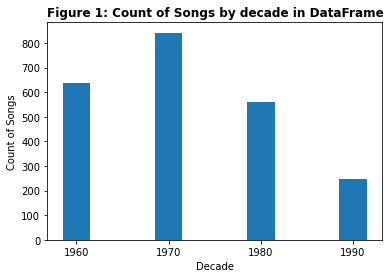

In [82]:
plt.bar(decade_count.index, decade_count, width=3, tick_label=decade_count.index)
plt.xlabel('Decade')
plt.ylabel('Count of Songs')
plt.title('Figure 1: Count of Songs by decade in DataFrame', loc='left', fontweight='heavy');

This was where I started diverting from my EDA perviously to complete my data pull. Looking at the Decade count, it is clearly evident that each decade gained a significant number of song entrires. The 1990's still look much lower then the other decades, which is interesting and something to keep note of moving forward. 

## Summary Statistics

In [83]:
spotify_df.describe()

,popularity,track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_samples,duration,end_of_fade_in,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,year,decade
count,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2.291000e+03,2291.000000,2.291000e+03,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000,2291.000000
mean,36.643387,0.005238,0.599874,0.626084,4.956351,-8.980239,0.738979,0.051964,0.300144,0.038955,0.231152,0.633508,118.869017,2.371153e+05,3.941074,5.228392e+06,237.115294,0.569677,227.975104,0.546877,0.939400,0.504526,0.508447,1976.446093,1971.833261
std,18.867426,0.072199,0.149970,0.199092,3.580005,3.317593,0.439287,0.043374,0.267123,0.147964,0.233110,0.247576,24.785799,8.211412e+04,0.271696,1.810616e+06,82.114114,1.180289,81.407782,0.293154,0.140675,0.245853,0.172323,9.900776,9.619401
min,0.000000,0.000000,0.000000,0.026500,0.000000,-23.936000,0.000000,0.000000,0.000019,0.000000,0.010500,0.000000,0.000000,4.864000e+04,0.000000,1.072512e+06,48.640000,0.000000,48.355560,0.000000,0.000000,0.000000,0.000000,1960.000000,1960.000000
25%,22.000000,0.000000,0.500000,0.483500,2.000000,-11.044000,0.000000,0.031500,0.059200,0.000000,0.089350,0.448000,102.559500,1.831530e+05,4.000000,4.038531e+06,183.153325,0.099095,174.997185,0.288000,0.948000,0.341500,0.403000,1968.000000,1960.000000
50%,35.000000,0.000000,0.612000,0.631000,5.000000,-8.537000,1.000000,0.038100,0.223000,0.000017,0.131000,0.680000,118.210000,2.268800e+05,4.000000,5.002704e+06,226.880000,0.243760,216.944050,0.598000,1.000000,0.519000,0.520000,1976.000000,1970.000000
75%,51.000000,0.000000,0.703000,0.790000,8.000000,-6.536000,1.000000,0.053500,0.496500,0.001220,0.287000,0.845000,130.803000,2.697735e+05,4.000000,5.948502e+06,269.773340,0.400840,261.117095,0.810500,1.000000,0.676000,0.626000,1985.000000,1980.000000
max,83.000000,1.000000,0.980000,0.994000,11.000000,-0.810000,1.000000,0.546000,0.986000,0.947000,1.000000,0.985000,214.631000,1.241267e+06,5.000000,2.736993e+07,1241.266700,18.535330,1210.833600,1.000000,1.000000,1.000000,1.000000,1999.000000,1990.000000


- Most of the features and analysis are scored between 0-1
- Popularity seems to be on a range of 0-100 but only has a max value of 83
- acousticness, instrumentalness and liveness have most of their values on the lower end of the scale but both do have max values close to 1
- The Track Features and Track Analysis seem to have common features among them such as key, tempo, duration, etc. Will need to look into this further to see if there are difference between values for each song and if not will need to drop one of the columns.

## Decade with High Avg Popularity

In [86]:
decade_pop = spotify_df.groupby('decade')['popularity'].mean().sort_values(ascending=False)
decade_pop

decade
1980    40.926916
1990    38.084337
1960    35.604069
1970    34.152019
Name: popularity, dtype: float64

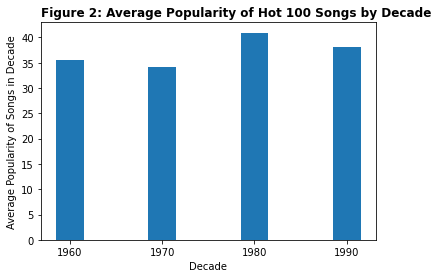

In [87]:
plt.bar(decade_pop.index, decade_pop, width=3, tick_label=decade_pop.index)
plt.xlabel('Decade')
plt.ylabel('Average Popularity of Songs in Decade')
plt.title('Figure 2: Average Popularity of Hot 100 Songs by Decade', loc='left', fontweight='heavy');

## Correlation Among Features

In [90]:
spotify_df.corr()

,popularity,track_explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,num_samples,duration,end_of_fade_in,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,year,decade
popularity,1.000000,0.026376,0.073242,-0.076646,-0.005997,-0.053523,-0.005598,-0.060099,-0.034404,-0.083652,-0.157098,0.020134,-0.002333,0.044745,-0.017390,0.044745,0.044745,0.029602,0.037689,0.003759,0.007553,0.033512,0.025143,0.107026,0.091063
track_explicit,0.026376,1.000000,0.094957,0.028070,0.029606,0.055734,0.029358,0.186485,-0.057413,-0.015633,0.014828,0.008817,-0.018326,0.007541,0.015741,0.007541,0.007541,0.088139,0.007087,0.029307,0.028385,-0.029258,-0.076458,0.117686,0.118207
danceability,0.073242,0.094957,1.000000,0.224571,-0.025339,0.095498,-0.151613,0.117148,-0.334097,0.025839,-0.277642,0.454647,-0.150063,0.084276,0.212380,0.084276,0.084276,-0.065938,0.081441,0.534036,0.297383,-0.080714,-0.142103,0.252154,0.238569
energy,-0.076646,0.028070,0.224571,1.000000,-0.028635,0.693458,-0.042509,0.184928,-0.549330,0.090383,0.215671,0.426334,0.155750,0.104028,0.223349,0.104028,0.104028,-0.020897,0.110816,0.432434,0.233666,-0.037296,-0.117079,0.140319,0.115163
key,-0.005997,0.029606,-0.025339,-0.028635,1.000000,0.007305,-0.248267,0.051160,0.019993,-0.043579,0.040443,-0.077761,-0.060053,-0.007383,-0.031378,-0.007383,-0.007383,-0.080561,-0.007886,-0.101575,0.012278,-0.095911,-0.075642,0.046553,0.028700
loudness,-0.053523,0.055734,0.095498,0.693458,0.007305,1.000000,-0.035054,0.061604,-0.323091,-0.058750,0.094998,0.147257,0.093676,-0.003617,0.117914,-0.003617,-0.003617,-0.087872,0.002313,0.165069,0.146437,-0.004616,-0.044041,0.128444,0.112096
mode,-0.005598,0.029358,-0.151613,-0.042509,-0.248267,-0.035054,1.000000,-0.007530,0.089550,0.012091,0.094580,-0.061954,0.009014,-0.080364,-0.066728,-0.080364,-0.080364,-0.002012,-0.078078,-0.083951,-0.066195,0.272575,0.250864,-0.142194,-0.115091
speechiness,-0.060099,0.186485,0.117148,0.184928,0.051160,0.061604,-0.007530,1.000000,-0.078396,0.064520,0.200255,0.052793,0.112755,0.003270,-0.024661,0.003270,0.003270,0.011283,0.011132,-0.014740,-0.062878,-0.102140,-0.144399,0.068851,0.075501
acousticness,-0.034404,-0.057413,-0.334097,-0.549330,0.019993,-0.323091,0.089550,-0.078396,1.000000,-0.082197,0.026703,-0.250176,-0.074571,-0.240716,-0.235434,-0.240716,-0.240716,0.003119,-0.240298,-0.405457,-0.299457,0.067971,0.116068,-0.289487,-0.241732
instrumentalness,-0.083652,-0.015633,0.025839,0.090383,-0.043579,-0.058750,0.012091,0.064520,-0.082197,1.000000,0.050365,0.008393,-0.016596,0.059916,0.016629,0.059916,0.059916,-0.009426,0.062403,0.105863,-0.023403,-0.033993,-0.047934,-0.075283,-0.084334


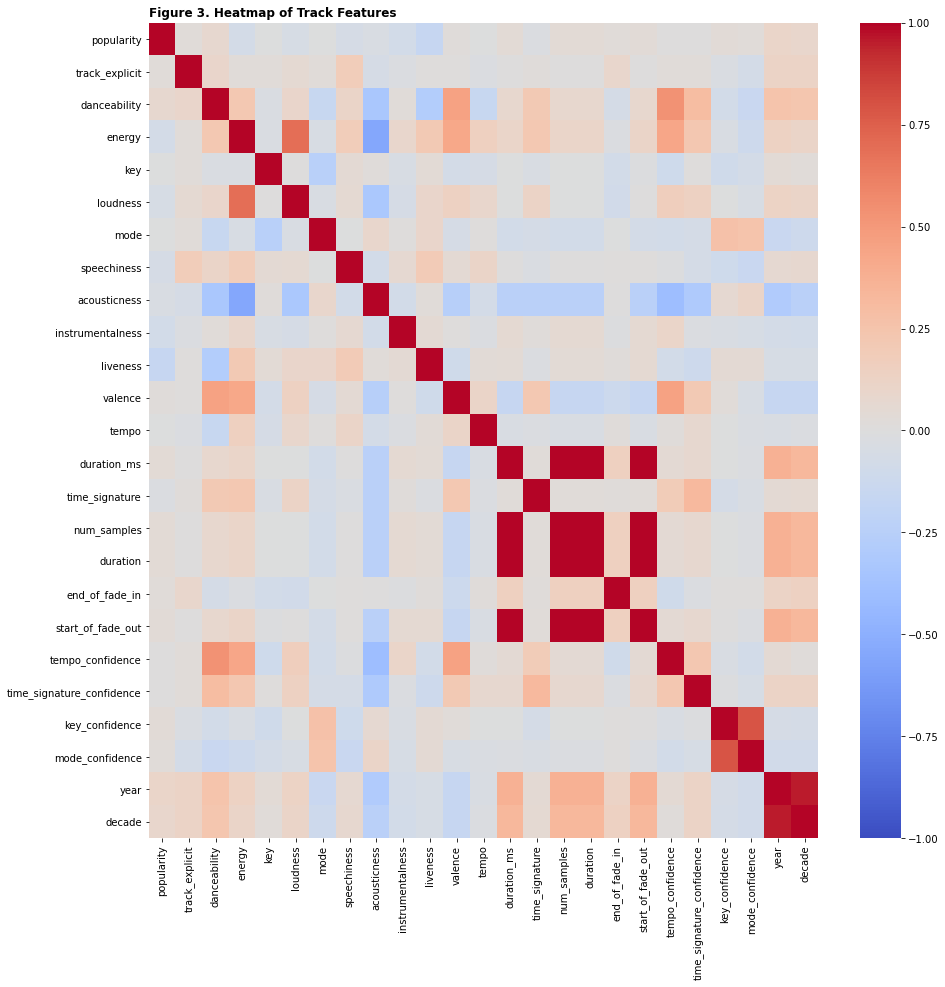

In [92]:
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(spotify_df.corr(), cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Figure 3. Heatmap of Track Features', loc='left', fontweight='heavy');

In [95]:
spotify_df.to_csv('../data/spotify_final.csv')